<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 6</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
Itamar Laredo   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
- When you finish the assignment, download this ***notebook*** and ***predictions.txt*** and submit it to the [**"submit"**](https://submit.cs.biu.ac.il/cgi-bin/welcome.cgi) system. 
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 18/1/2023

## Part 1 - K-Means (50%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [2]:
## Generate 2D data 
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

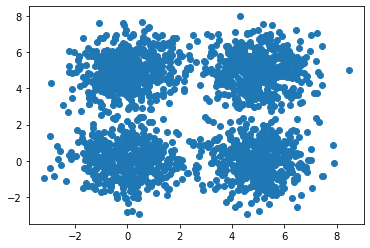

In [3]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [4]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.current_centroids = []
        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X. 
                                # This can be useful for the next tasks.
        
        self.labels_ = None     # Here you should store the final labels. 
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.
        
        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
      self.X_fit_ = X
      n_samples, n_features = X.shape
      self.current_centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
      self.centroids_history.append(self.current_centroids)

      for i in range(self.max_iter):
        labels = self._get_labels(X)
        self.current_centroids = self._get_centroids(X, labels)
        self.centroids_history.append(self.current_centroids)
        self.labels_history.append(labels)
        self.costs.append(self._calculate_cost(X))
      
        if (self.current_centroids == self.centroids_history[-2]).any():
          break
      
      self.labels_ = labels
      self.centroids = self.current_centroids

    def predict(self, X):
      return self._get_labels(X)

    def _get_distances(self, X):
      distances = []
      for point in X:
        point_distances = []
        for centroid in self.current_centroids:
          point_distances.append(np.linalg.norm(point - centroid))
        distances.append(point_distances)
      return np.array(distances)

    def _get_labels(self, X):
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
      new_centroids = []
      for i in range(self.n_clusters):
        cluster_points = X[labels == i]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
      return np.array(new_centroids)

    def _calculate_cost(self, X):
        distances = self._get_distances(X)
        return np.min(distances, axis=1).sum()
    


Run the algorithm on the 2D dataset

In [5]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

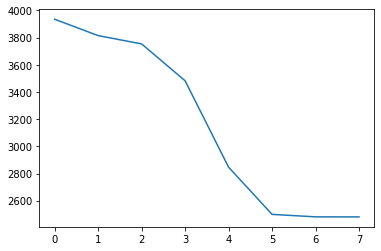

In [6]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 5375.2091840460125 <br>
3 clusters: 3893.885127585926 <br>
4 clusters: 2457.627852082995 <br>
6 clusters: 2252.646735493212 <br>
8 clusters: 2090.6570157972883 <br>
10 clusters: 1880.6095740824753 <br>
20 clusters: 1342.4951387903325 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

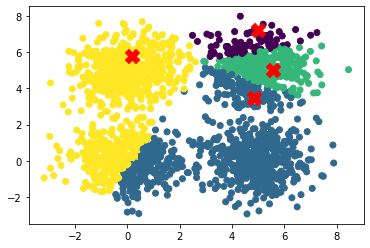

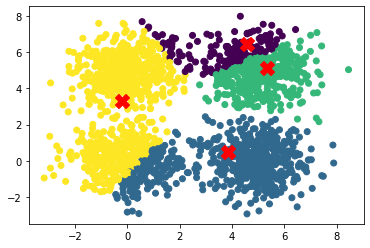

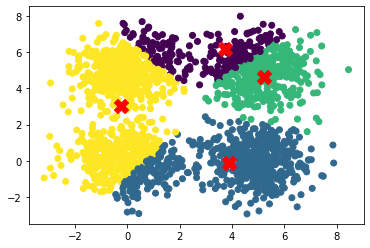

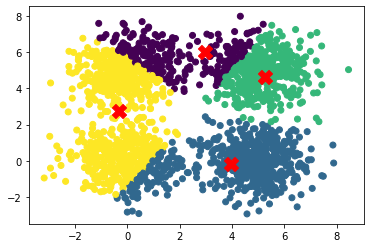

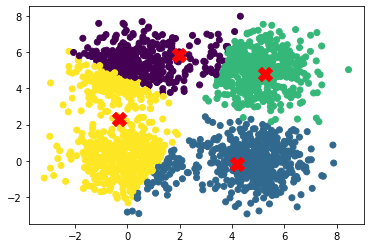

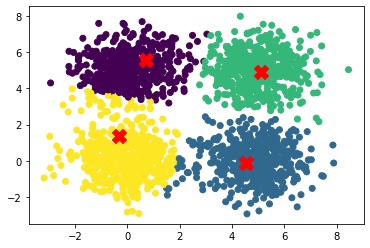

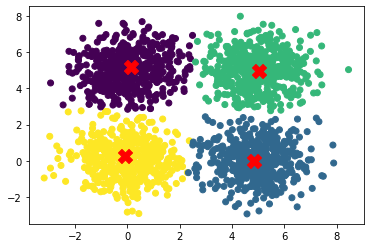

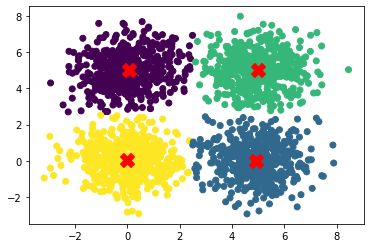

In [7]:
centroids = kmeans.centroids_history
labels = kmeans.labels_history

for i in range(len(centroids) - 1):
    plt.scatter(X[:, 0], X[:, 1], c=labels[i], cmap='viridis')
    plt.scatter(centroids[i][:, 0], centroids[i][:, 1], c='red', marker='X', s=200)
    plt.show()


## Part 2 - PCA (50%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [8]:
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [9]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [10]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
      X = X - np.mean(X, axis=0)
      eigenvalues, eigenvectors = np.linalg.eig(np.cov(X.T))
      t_index = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[t_index]
      eigenvectors = eigenvectors[:, t_index]
      self.V = eigenvectors
      return self.V

    def transform(self, X, n_dimentions):
      X_reduced = np.dot(X, self.V[:, :n_dimentions])
      return X_reduced



Run the algorithm on MNIST dataset.

In [11]:
pca = PCA()
V = pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


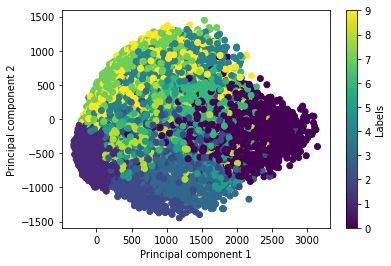

In [12]:
y = [int(label) for label in y]

fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

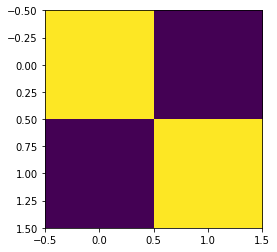

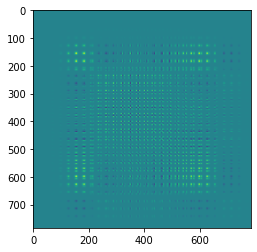

In [13]:
r = 2
V = pca.V[:, :r]

VTV = np.dot(V.T, V)
plt.imshow(np.real(VTV))
plt.show()

VVT = np.dot(V, V.T)
plt.imshow(np.real(VVT))
plt.show()

VTV dimension is rxr where r is the number of the top eigenvectors in V (basic vectors).
VTVx is the decoder to the data and after as well the encoder.

on the other hand, VVT dimention is dxd where d is the number of the features in the original data.
VVTx is the encoder and then the decoder (opposite to VTVx)

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [14]:
def pca_reconstruction(x, n_dimentions):
    x_reduced = np.dot(x, pca.V[:, :n_dimentions])
    x_reconstructed = np.dot(x_reduced, pca.V[:, :n_dimentions].T)
    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


<ipython-input-15-0f3e78f4d75a>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image_3d = np.array(reconstructed_image_3d, dtype='float')


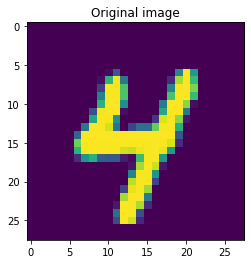

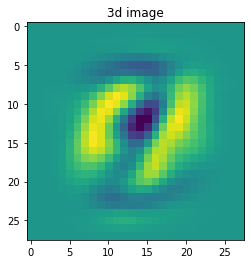

<ipython-input-15-0f3e78f4d75a>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image_10d = np.array(reconstructed_image_10d, dtype='float')


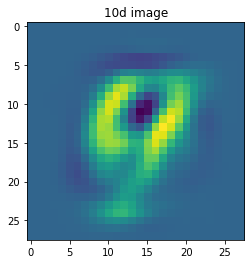

<ipython-input-15-0f3e78f4d75a>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image_100d = np.array(reconstructed_image_100d, dtype='float')


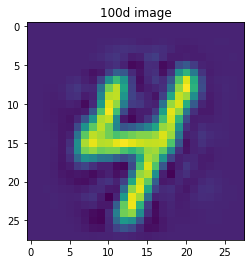

In [15]:
image = X[np.random.randint(0, X.shape[0])]

plt.title("Original image")
plt.imshow(image.reshape((28,28)))
plt.figure()

reconstructed_image_3d = pca_reconstruction(image, 3)
reconstructed_image_3d = np.array(reconstructed_image_3d, dtype='float')
plt.title("3d image")
plt.imshow(reconstructed_image_3d.reshape((28, 28)))
plt.show()

reconstructed_image_10d = pca_reconstruction(image, 10)
reconstructed_image_10d = np.array(reconstructed_image_10d, dtype='float')
plt.title("10d image")
plt.imshow(reconstructed_image_10d.reshape((28, 28)))
plt.show()

reconstructed_image_100d = pca_reconstruction(image, 100)
reconstructed_image_100d = np.array(reconstructed_image_100d, dtype='float')
plt.title("100d image")
plt.imshow(reconstructed_image_100d.reshape((28, 28)))
plt.show()

as we can see we lose data when we use the reconstruction, but as we increase in the space dimention we get closer to the original data